In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Code')

from utility_functions import *
from weight_matrix import *
from parameters import *
from sim_network_EI import sim_network_Perturb
from scipy.special import lambertw, exp1, expi, hyp2f1, gamma, gammaincc
from scipy import optimize, integrate
import mpmath as mp
from natsort import natsorted
from glob import glob
from phi import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [2]:
E = np.arange(0, 2, 0.001)
J = np.arange(0, 8, 0.001)
theta = np.array([0,1,2,3,4,5])

In [3]:
# Phase plot
E_plot_phase0 = np.zeros((len(J), len(theta)))
E_plot_phase1 = np.zeros((len(J), len(theta)))

for i in range(len(theta)):

    lambert0 = lambertw(-np.exp(theta[i] + 1 - J), 0)
    lambert1 = lambertw(-np.exp(theta[i] + 1 - J), -1)
    E_plot_phase0[:, i] = J - (1 - lambert0) * (1 + np.exp(J - 1 - theta[i] + lambert0))
    E_plot_phase1[:, i] = J - (1 - lambert1) * (1 + np.exp(J - 1 - theta[i] + lambert1))

    idxJ = np.where(np.abs(J - theta[i] - 2) < 10e-8)[0][0]
    E_plot_phase0[0:idxJ, i] = np.nan
    E_plot_phase1[0:idxJ, i] = np.nan

/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_43081/1012036927.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  E_plot_phase0[:, i] = J - (1 - lambert0) * (1 + np.exp(J - 1 - theta[i] + lambert0))
/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_43081/1012036927.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  E_plot_phase1[:, i] = J - (1 - lambert1) * (1 + np.exp(J - 1 - theta[i] + lambert1))


In [5]:
parameters = network_params()
parameters.N = 100
parameters.IeE = -0.75
parameters.wEE = 4.0
parameters.tstop = 10
parameters.Nt = int(parameters.tstop / parameters.dt)
parameters.simPhi = 1.0
parameters.maxSpikes = 5000 * parameters.N * parameters.tstop / 1000  # 500 Hz neuron

t_start_perturb1 = 1
t_start_perturb2 = 5
t_end_perturb1 = 2
t_end_perturb2 = 6
perturb_amp = 3.0

np.random.seed(894956166)
W = get_weight_matrix_Exc_N(parameters)
spkTrain, memVol, gSyn, spkTimes, count = sim_network_Perturb(parameters, W, t_start_perturb1, t_start_perturb2, t_end_perturb1, t_end_perturb2, perturb_amp)

t_plot = np.arange(0, parameters.Nt, 1) * parameters.dt

In [6]:
parameters = network_params()
parameters.N = 100
parameters.IeE = -2.0
parameters.wEE = 4.0
parameters.tstop = 10
parameters.Nt = int(parameters.tstop / parameters.dt)
parameters.simPhi = 1.0

t_start_perturb1 = 1
t_start_perturb2 = 5
t_end_perturb1 = 2
t_end_perturb2 = 6
perturb_amp = 3.0

np.random.seed(894956166)
W = get_weight_matrix_Exc_N(parameters)
spkTrainS, memVolS, gSynS, spkTimesS, countS = sim_network_Perturb(parameters, W, t_start_perturb1, t_start_perturb2, t_end_perturb1, t_end_perturb2, perturb_amp)

t_plot = np.arange(0, parameters.Nt, 1) * parameters.dt

In [7]:
filename = '../Data/Figure 3/500Data_Exp.npz'
data = np.load(filename)

fr_Sim_L = data['arr_0']
fr_Sim_H = data['arr_1']

fr_MF_L = data['arr_4']
fr_MF_H = data['arr_5']

fr_MF_Perturb_L = data['arr_8']
fr_MF_Perturb_H = data['arr_9']

fr_MF_SC_L = data['arr_12']
fr_MF_SC_H = data['arr_13']

In [8]:
filename = '../Data/Figure 3/Data_Renewal_Exp_Homogeneous.npz'
data = np.load(filename)

n_Renewal_L = data['arr_0']
n_Renewal_H = data['arr_1']

n_Renewal_L = np.nan_to_num(n_Renewal_L)
n_Renewal_H = np.nan_to_num(n_Renewal_H)

In [9]:
E_plot = np.arange(0,1.6,0.1)

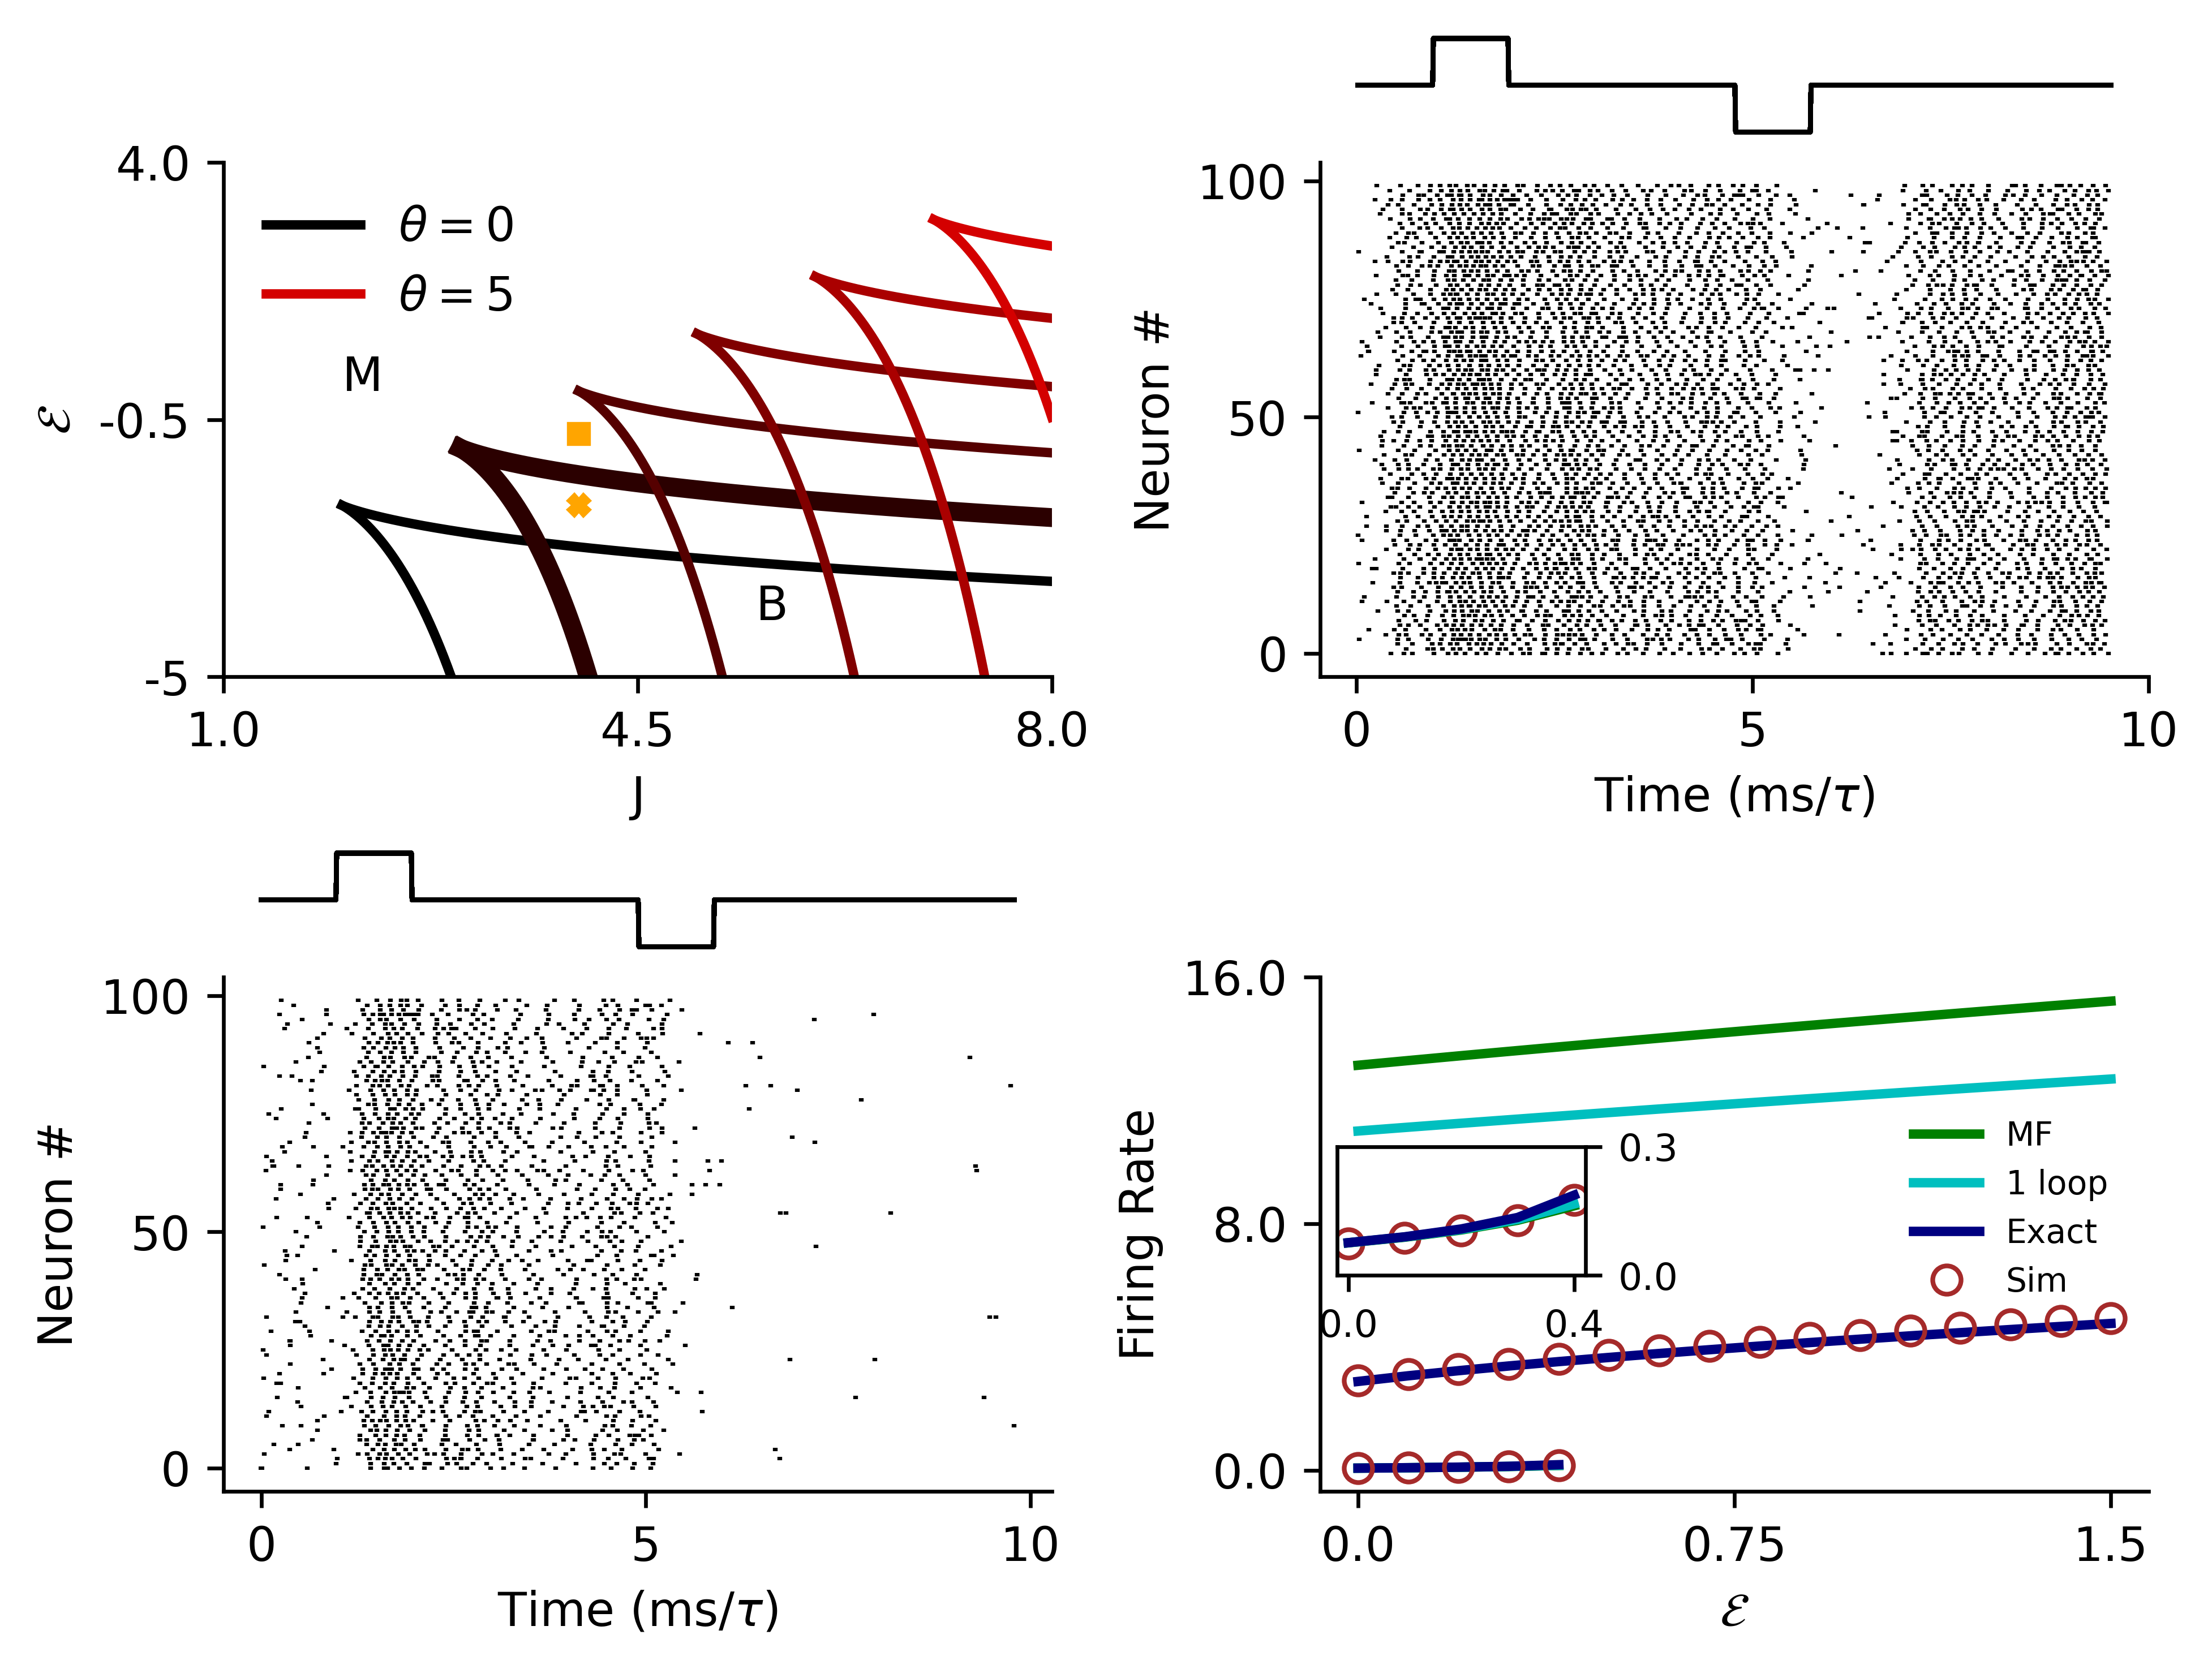

In [10]:
COLOR = (0., 0., 0.)

def color_conv(color_range):
    return (COLOR[0] + color_range, COLOR[1], COLOR[2]) 


fontsize=10
J_limL = 1.0
J_limH = 8.0
E_limL = -5.0
E_limH = 4.0

f, ax = plt.subplots(2,2,dpi=600,layout='constrained')

tt = 1 / len(theta)
for i in range(len(theta)):
    if i == 0 or i == len(theta)-1:
        ax[0, 0].plot(J, E_plot_phase0[:,i], color=color_conv(i*tt), linewidth=2, label='$\\theta=$'+str(theta[i]))
    else:
        ax[0, 0].plot(J, E_plot_phase0[:,i], color=color_conv(i*tt), linewidth=2)

    if theta[i] == 1.0:
        ax[0, 0].plot(J, E_plot_phase0[:,i], color=color_conv(i*tt), linewidth=4)
        ax[0, 0].plot(J, E_plot_phase1[:,i], color=color_conv(i*tt), linewidth=4)
    else:
        ax[0, 0].plot(J, E_plot_phase1[:,i], color=color_conv(i*tt), linewidth=2)


ax[0, 0].set_xlabel('J', fontsize=fontsize)
ax[0, 0].set_ylabel('$\\mathcal{E}$', fontsize=fontsize)
ax[0, 0].text(5.5, -4.0, 'B', fontsize=fontsize)
ax[0, 0].text(2.0, 0.0, 'M', fontsize=fontsize)
ax[0, 0].plot(4.0, -2.0, 'X', color='orange', markersize=4.0)
ax[0, 0].plot(4.0, -0.75, 's', color='orange', markersize=4.0)
xticks = [1.0, 4.5, 8.0]
yticks = [-5, -0.5, 4.0]
ax[0, 0].set_xticks(xticks, xticks, fontsize=fontsize)
ax[0, 0].set_yticks(yticks, yticks, fontsize=fontsize)
ax[0, 0].set_xlim(J_limL, J_limH)
ax[0, 0].set_ylim(E_limL, E_limH)
ax[0, 0].legend(frameon=False, loc='upper left', fontsize=fontsize)
# ax[0, 0].set_aspect(1./ax[0,0].get_data_ratio())

ax[0, 1].plot(spkTimes[:,0], spkTimes[:,1],'|k', markersize=.8)
ax[0, 1].set_xlabel('Time (ms/{})'.format(r'$\tau$'), fontsize=fontsize)
ax[0, 1].set_ylabel('Neuron #', fontsize=fontsize)
# ax[0, 1].set_aspect(1./ax[0,1].get_data_ratio())
xticks = [0, 5, 10]
yticks = [0, 50, 100]
ax[0, 1].set_xticks(xticks, xticks, fontsize=fontsize)
ax[0, 1].set_yticks(yticks, yticks, fontsize=fontsize)
inset_ax1 = ax[0, 1].inset_axes([0., 1.05, 1.0, 0.2])
inset_ax1.plot(t_plot, gSyn, 'k', linewidth=1.0)
inset_ax1.set_xticks([])
inset_ax1.set_yticks([]) 
inset_ax1.spines[['left', 'right', 'top', 'bottom']].set_visible(False)


ax[1, 0].plot(spkTimesS[:,0], spkTimesS[:,1],'|k', markersize=.8)
ax[1, 0].set_xlabel('Time (ms/{})'.format(r'$\tau$'), fontsize=fontsize)
ax[1, 0].set_ylabel('Neuron #', fontsize=fontsize)
# ax[1, 0].set_aspect(1./ax[1,0].get_data_ratio())
xticks = [0, 5, 10]
yticks = [0, 50, 100]
ax[1, 0].set_xticks(xticks, xticks, fontsize=fontsize)
ax[1, 0].set_yticks(yticks, yticks, fontsize=fontsize)
inset_ax2 = ax[1, 0].inset_axes([0., 1.05, 1.0, 0.2])
inset_ax2.plot(t_plot, gSynS, 'k', linewidth=1.0)
inset_ax2.set_xticks([])
inset_ax2.set_yticks([]) 
inset_ax2.spines[['left', 'right', 'top', 'bottom']].set_visible(False)


idxE = np.where(np.abs((fr_MF_H - fr_MF_L) < 10e-8) & (fr_MF_H > 0.))[0][0]
ax[1, 1].plot(E_plot, fr_MF_H, '-g', linewidth=2.0)
ax[1, 1].plot(E_plot[0:idxE-1], fr_MF_L[0:idxE-1], '-g', linewidth=2.0, label='MF')
ax[1, 1].plot(E_plot, fr_MF_Perturb_H, '-c', linewidth=2.0)
ax[1, 1].plot(E_plot[0:idxE-1], fr_MF_Perturb_L[0:idxE-1], '-c', linewidth=2.0, label='1 loop')
ax[1, 1].plot(E_plot, n_Renewal_H, '-', color='navy', linewidth=2.0, label='Exact')
ax[1, 1].plot(E_plot[0:idxE-1], n_Renewal_L[0:idxE-1], '-', color='navy', linewidth=2.0)
ax[1, 1].plot(E_plot, fr_Sim_H, 'o', color='brown',markerfacecolor='None')
ax[1, 1].plot(E_plot[0:idxE-1], fr_Sim_L[0:idxE-1], 'o', color='brown',markerfacecolor='None', label='Sim')
ax[1, 1].set_xlabel('$\\mathcal{E}$', fontsize=fontsize)
ax[1, 1].set_ylabel('Firing Rate', fontsize=fontsize)
xticks = [0.0, 0.75, 1.5]
yticks = [0.0, 8.0, 16.0]
ax[1, 1].set_xticks(xticks, xticks, fontsize=fontsize)
ax[1, 1].set_yticks(yticks, yticks, fontsize=fontsize)
inset_ax3 = ax[1, 1].inset_axes([0.02, 0.42, 0.30, 0.25])
inset_ax3.plot(E_plot[0:idxE-1], fr_Sim_L[0:idxE-1], 'o', color='brown',markerfacecolor='white')
inset_ax3.plot(E_plot[0:idxE-1], fr_MF_L[0:idxE-1], '-g', linewidth=2.0, label='MF')
inset_ax3.plot(E_plot[0:idxE-1], fr_MF_Perturb_L[0:idxE-1], '-c', linewidth=2.0)
inset_ax3.plot(E_plot[0:idxE-1], n_Renewal_L[0:idxE-1], '-', color='navy', linewidth=2.0)
xticks = [0., 0.4]
yticks = [0., 0.3]
inset_ax3.set_xticks(xticks, xticks, fontsize=8)
inset_ax3.set_yticks(yticks, yticks, fontsize=8) 
inset_ax3.yaxis.tick_right()
ax[1, 1].legend(frameon=False, loc=[0.7, 0.35],fontsize=7)
# ax[1, 1].set_aspect(1./ax[1,1].get_data_ratio())

sns.despine(ax=ax[0, 0])
sns.despine(ax=ax[0, 1])
sns.despine(ax=ax[1, 0])
sns.despine(ax=ax[1, 1])

f.savefig('./Figures/Figure3.pdf', format='pdf')
plt.show()
